<a href="https://colab.research.google.com/github/ryaltic/Spaceship-Titanic-Kaggle/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/ryaltic/Spaceship-Titanic-Kaggle/refs/heads/main/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [27]:
df.head(n=10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [28]:
df['PassengerId'].is_unique

True

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Transported'])   # features
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=18,
    stratify=y
)



In [30]:
def add_passenger_group(df):
    df = df.copy()

    df['PassengerGroup'] = df['PassengerId'].str[:4]
    df = df.drop(columns=['PassengerId'])

    return df

X_train = add_passenger_group(X_train)
X_test  = add_passenger_group(X_test)

In [31]:
def get_duplicate_name_counts(df, name_col='Name'):
    name_counts = df[name_col].value_counts()
    return name_counts[name_counts > 1]

train_dupes = get_duplicate_name_counts(X_train)
test_dupes  = get_duplicate_name_counts(X_test)



In [32]:
def get_rows_with_duplicate_names(df, name_col='Name'):
    name_counts = df[name_col].value_counts()
    dupe_names = name_counts[name_counts > 1].index

    return (
        df[df[name_col].isin(dupe_names)]
        .sort_values(name_col)
    )

train_dupe_rows = get_rows_with_duplicate_names(X_train)
test_dupe_rows  = get_rows_with_duplicate_names(X_test)


In [33]:
X_train.drop(columns=['Name'], inplace=True)
X_train.head()

X_test.drop(columns=['Name'], inplace=True)
X_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup
3177,Europa,False,E/234/S,TRAPPIST-1e,31.0,False,0.0,1216.0,0.0,897.0,478.0,3425
6205,NaN,False,B/253/S,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,6561
8345,Europa,False,D/280/P,TRAPPIST-1e,26.0,False,0.0,70.0,0.0,41.0,NaN,8920
7490,Earth,True,G/1294/S,TRAPPIST-1e,38.0,False,0.0,0.0,0.0,0.0,0.0,8014
1734,Earth,False,G/290/S,TRAPPIST-1e,65.0,False,5.0,317.0,NaN,0.0,123.0,1847


In [34]:
X_train.groupby('HomePlanet').count()
X_test.groupby('HomePlanet').count()

,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup
HomePlanet,,,,,,,,,,,
Earth,920,915,914,926,911,923,916,916,917,918,938
Europa,379,376,384,384,387,386,383,382,382,382,391
Mars,367,372,368,368,369,370,370,367,374,371,378


In [35]:
X_train.groupby('Destination').count()
X_test.groupby('Destination').count()

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup
Destination,,,,,,,,,,,
55 Cancri e,331,321,321,328,324,330,326,320,324,327,333
PSO J318.5-22,156,153,153,155,154,153,153,156,152,156,156
TRAPPIST-1e,1179,1182,1179,1183,1179,1184,1180,1179,1186,1177,1207


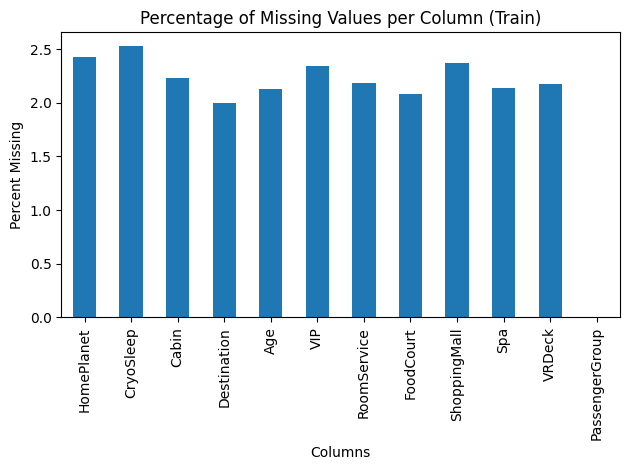

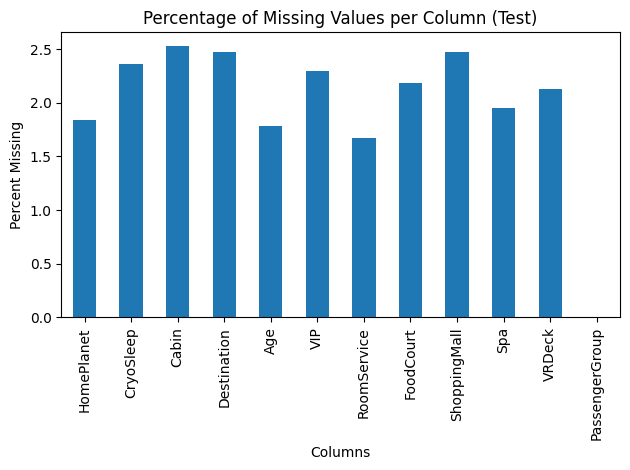

In [36]:
import matplotlib.pyplot as plt

def plot_missing_percentages(df, title_suffix=""):
    missing_pct = df.isna().mean() * 100

    missing_pct.plot(kind='bar')
    plt.title(f"Percentage of Missing Values per Column {title_suffix}")
    plt.ylabel("Percent Missing")
    plt.xlabel("Columns")
    plt.tight_layout()
    plt.show()

plot_missing_percentages(X_train, "(Train)")
plot_missing_percentages(X_test, "(Test)")



In [37]:
missing_cols = [
    'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
    'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
]

# Create a single flag: 1 if any of the listed columns is missing, else 0
X_train['Any_Missing'] = X_train[missing_cols].isna().any(axis=1).astype(int)
X_test['Any_Missing']  = X_test[missing_cols].isna().any(axis=1).astype(int)



In [38]:
def split_cabin(df):
    df = df.copy()

    df['Deck'] = df['Cabin'].str.split('/').str[0]
    df['Side'] = df['Cabin'].str.split('/').str[2]
    df = df.drop(columns=['Cabin'])

    return df

X_train = split_cabin(X_train)
X_test  = split_cabin(X_test)


In [39]:
from sklearn.impute import SimpleImputer

numeric_cols = X_train.select_dtypes(include="number").columns
num_imputer = SimpleImputer(strategy="median")

X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = num_imputer.transform(X_test[numeric_cols])

cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns
cat_imputer = SimpleImputer(strategy="most_frequent")

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])


In [40]:
import matplotlib.pyplot as plt

def plot_missing_percentages(df, title_suffix=""):
    missing_pct = df.isna().mean() * 100
    missing_pct = missing_pct[missing_pct > 0]  # only columns with missing values

    if missing_pct.empty:
        print(f"No missing values found {title_suffix}")
        return

    missing_pct.plot(kind='bar', figsize=(10,5))
    plt.title(f"Percentage of Missing Values per Column {title_suffix}")
    plt.ylabel("Percent Missing")
    plt.xlabel("Columns")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_missing_percentages(X_train, "(Train)")
plot_missing_percentages(X_test, "(Test)")


No missing values found (Train)
No missing values found (Test)


In [41]:
def add_group_sum_features_train_test(X_train, X_test, group_col, bool_cols):
    X_train = X_train.copy()
    X_test  = X_test.copy()

    for col in bool_cols:
        # Compute sum per group on TRAIN
        group_sum = X_train.groupby(group_col)[col].transform(lambda x: x.astype(int).sum())
        X_train[f"group_{col}"] = group_sum

        # Map the same sums to TEST based on group
        mapping = X_train.groupby(group_col)[col].sum()
        X_test[f"group_{col}"] = X_test[group_col].map(mapping).fillna(0)

    # Drop the original group column if desired
    X_train = X_train.drop(columns=[group_col])
    X_test  = X_test.drop(columns=[group_col])

    return X_train, X_test

bool_cols = ['VIP', 'CryoSleep']
X_train, X_test = add_group_sum_features_train_test(X_train, X_test, 'PassengerGroup', bool_cols)


In [42]:
def add_total_spend(df):
    df = df.copy()

    spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df['TotalSpend'] = df[spend_cols].sum(axis=1)

    return df

X_train = add_total_spend(X_train)
X_test  = add_total_spend(X_test)



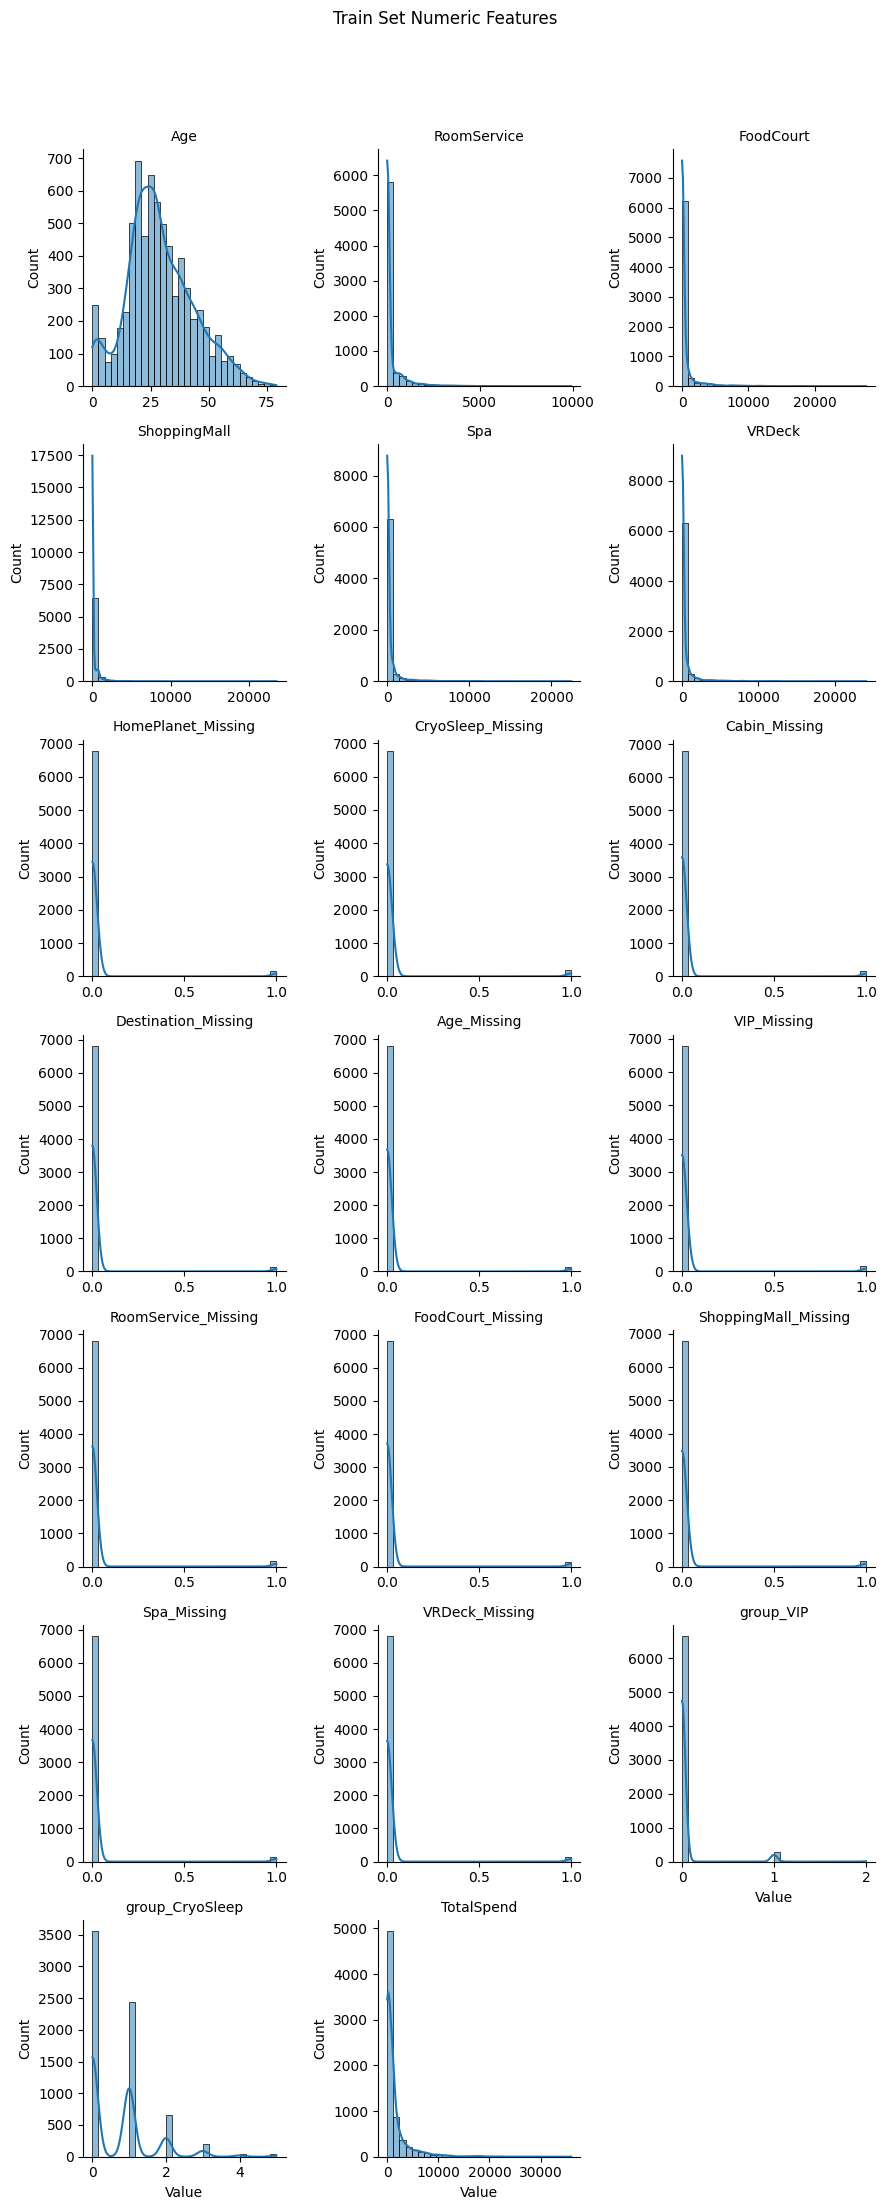

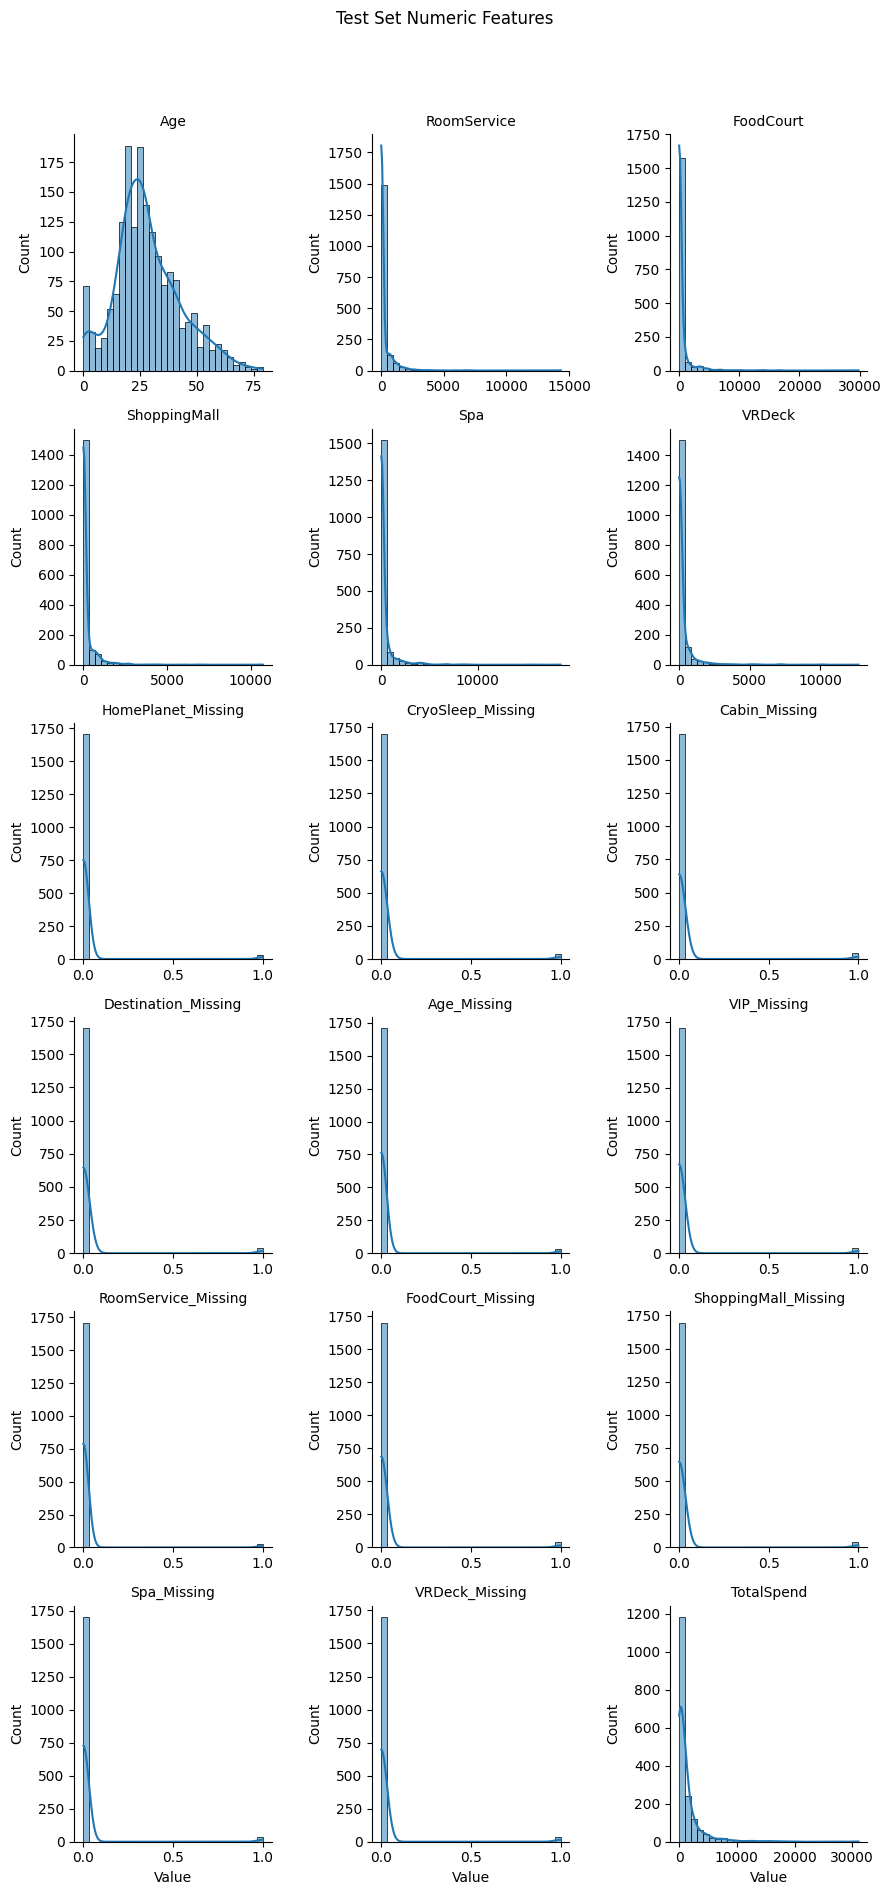

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_numeric_distributions(df, title="Distribution of Numeric Features", col_wrap=3, bins=30, kde=True):
    numeric_columns = df.select_dtypes(include="number")
    if numeric_columns.empty:
        print("No numeric columns found.")
        return

    # Melt to long format
    df_long = numeric_columns.melt(var_name="Feature", value_name="Value")

    # FacetGrid
    g = sns.FacetGrid(
        df_long,
        col="Feature",
        col_wrap=col_wrap,
        sharex=False,
        sharey=False
    )

    g.map(sns.histplot, "Value", bins=bins, kde=kde)
    g.set_titles("{col_name}")
    g.fig.suptitle(title, y=1.05)

    plt.show()

plot_numeric_distributions(X_train, title="Train Set Numeric Features")
plot_numeric_distributions(X_test, title="Test Set Numeric Features")



In [44]:
# Potentially logging RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
# or just Target Variable
# Could create binned variables

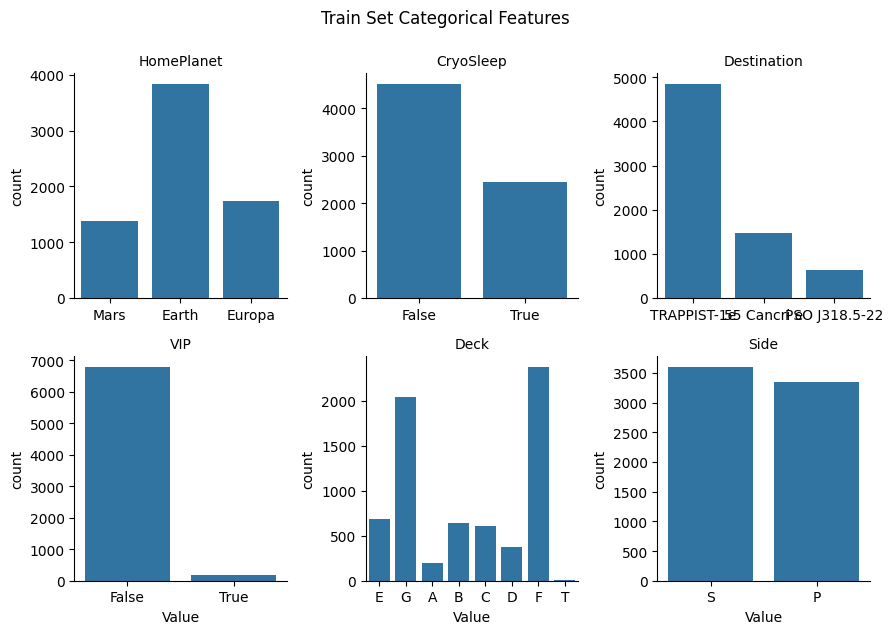

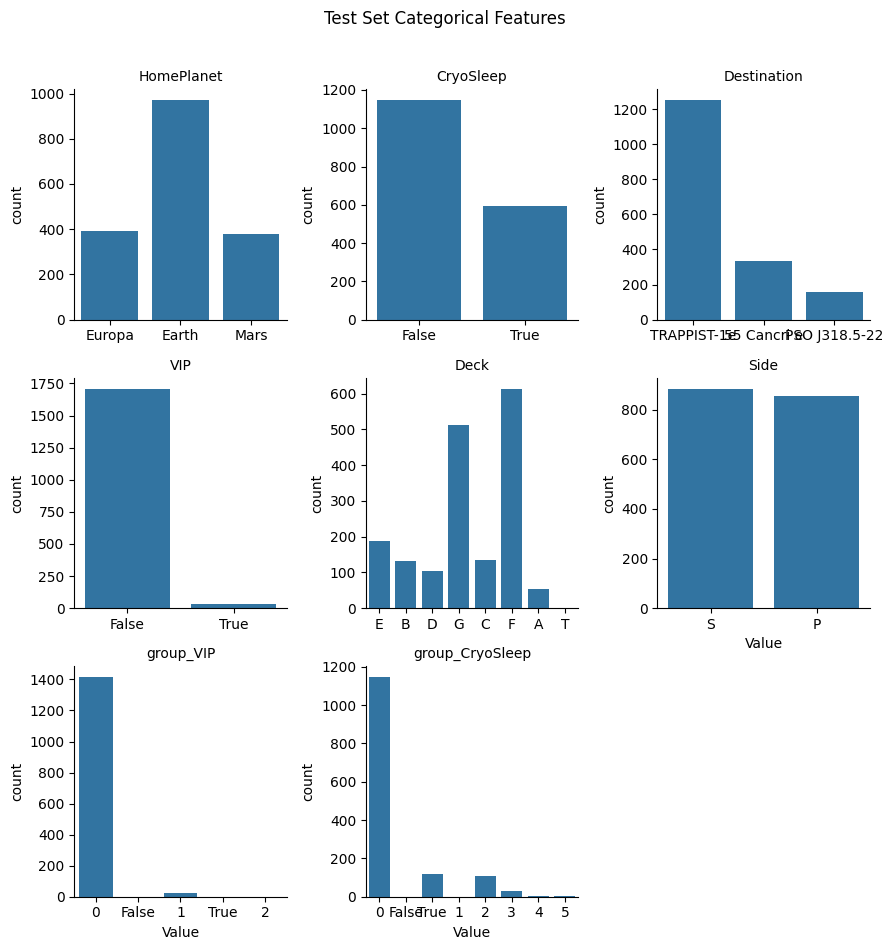

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_categorical_counts(df, title="Counts of Categorical Features", col_wrap=3):
    cat_columns = df.select_dtypes(include=["object", "category", "bool"])
    if cat_columns.empty:
        print("No categorical columns found.")
        return

    # Melt to long format
    df_long = cat_columns.melt(var_name="Feature", value_name="Value")

    # FacetGrid
    g = sns.FacetGrid(
        df_long,
        col="Feature",
        col_wrap=col_wrap,
        sharex=False,
        sharey=False
    )

    g.map(sns.countplot, "Value", order=None)
    g.set_titles("{col_name}")
    g.fig.suptitle(title, y=1.05)

    plt.show()

plot_categorical_counts(X_train, title="Train Set Categorical Features")
plot_categorical_counts(X_test, title="Test Set Categorical Features")



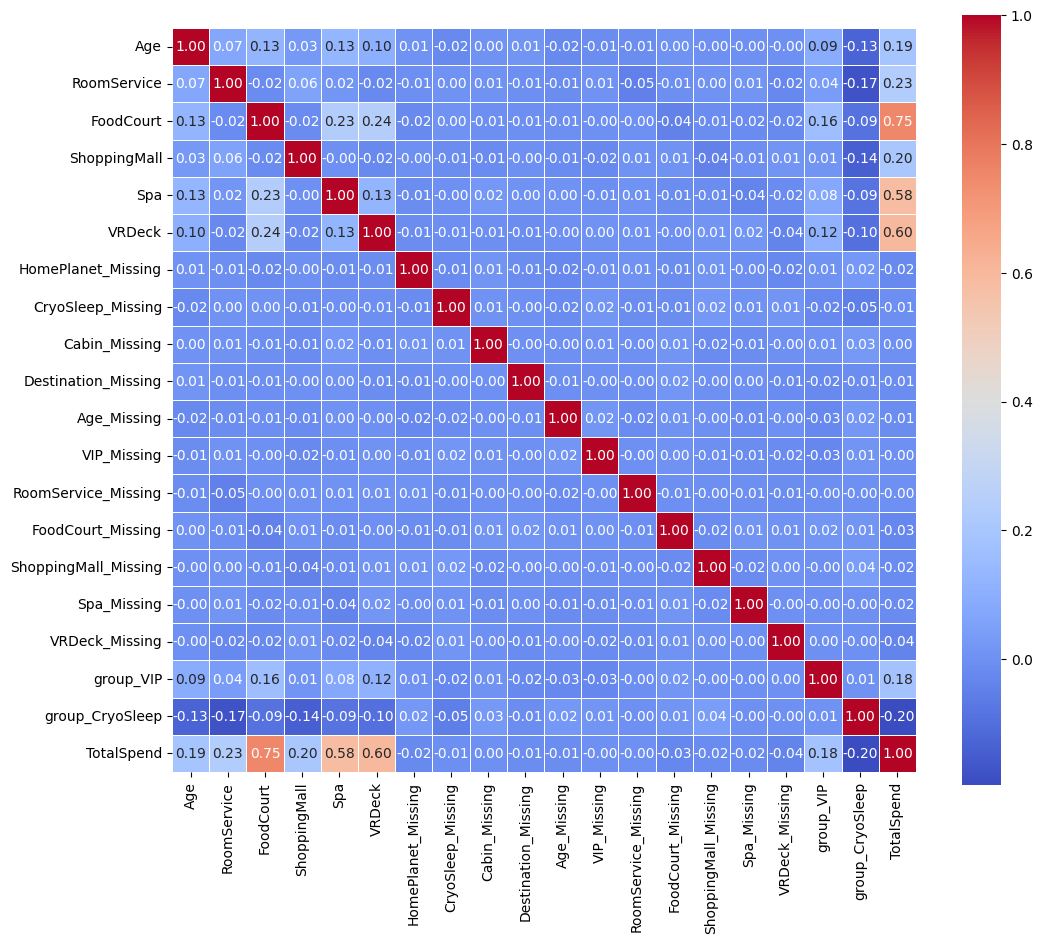

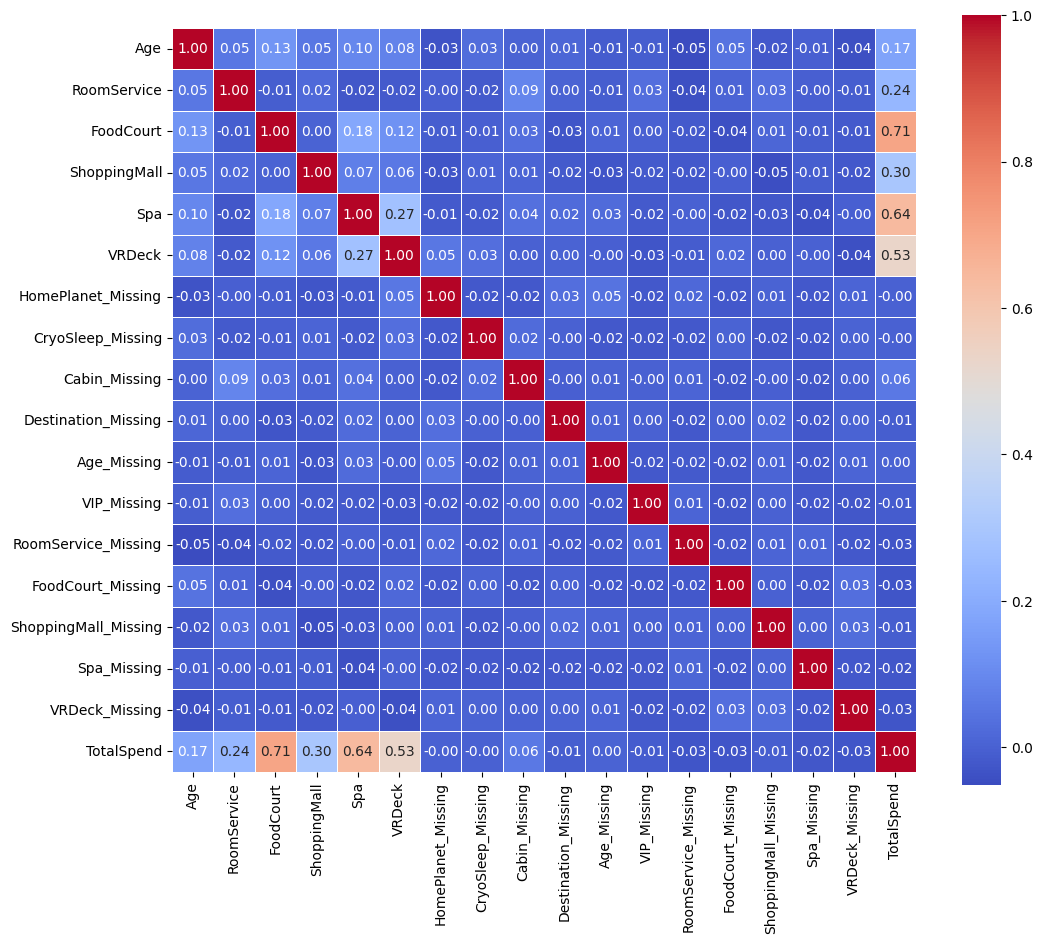

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, title="Correlation Matrix (Numeric Features)", figsize=(12, 10), cmap="coolwarm"):
    numeric_columns = df.select_dtypes(include="number")
    if numeric_columns.empty:
        print("No numeric columns found.")
        return

    corr = numeric_columns.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap=cmap,
        square=True,
        cbar=True,
        linewidths=0.5
    )
    plt.title

plot_correlation_matrix(X_train, title="Train Set Numeric Correlations")
plot_correlation_matrix(X_test, title="Test Set Numeric Correlations")


In [47]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include='number').columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])


In [ ]:
X_train_dummies = pd.get_dummies(X_train, columns=cat_cols, drop_first=False)
X_test_dummies  = pd.get_dummies(X_test, columns=cat_cols, drop_first=False)

X_train_dummies, X_test_dummies = X_train_dummies.align(X_test_dummies, join='left', axis=1)


In [49]:
# Things to do
# Modelling
# Documenation